# ロジスティック回帰モデルを使ったクラウドファンディングの成功予測
（ks-projects-201801.csv）

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
#from sklearn import preprocessing
#from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
import seaborn as sns

# １．データの読み込み

In [2]:
df_cloudfound = pd.read_csv("../1_data/ks-projects-201801.csv")
df_cloudfound['state'] = df_cloudfound['state'] == "successful"

# データ表示
display(df_cloudfound.head(10))
df_cloudfound.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015/10/9,1000.0,2015/8/11 12:12,0.00,False,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017/11/1,30000.0,2017/9/2 4:43,2421.00,False,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013/2/26,45000.0,2013/1/12 0:20,220.00,False,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012/4/16,5000.0,2012/3/17 3:24,1.00,False,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015/8/29,19500.0,2015/7/4 8:35,1283.00,False,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016/4/1,50000.0,2016/2/26 13:38,52375.00,True,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014/12/21,1000.0,2014/12/1 18:30,1205.00,True,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016/3/17,25000.0,2016/2/1 20:05,453.00,False,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014/5/29,125000.0,2014/4/24 18:14,8233.00,False,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014/8/10,65000.0,2014/7/11 21:55,6240.57,False,43,US,6240.57,6240.57,65000.00


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.783830e+05,3.783830e+05,3.783830e+05,378383.000000,3.745880e+05,3.783830e+05,3.783830e+05
mean,1.074702e+09,4.909549e+04,9.685035e+03,105.634133,7.037652e+03,9.060508e+03,4.546735e+04
std,6.190547e+08,1.183815e+06,9.566667e+04,907.447994,7.866347e+04,9.100205e+04,1.153363e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.384098e+08,2.000000e+03,3.000000e+01,2.000000,1.693750e+01,3.100000e+01,2.000000e+03
50%,1.075131e+09,5.200000e+03,6.200000e+02,12.000000,3.940100e+02,6.240000e+02,5.500000e+03
75%,1.610088e+09,1.600000e+04,4.076000e+03,56.000000,3.033197e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCD5992278>,
      dtype=object)

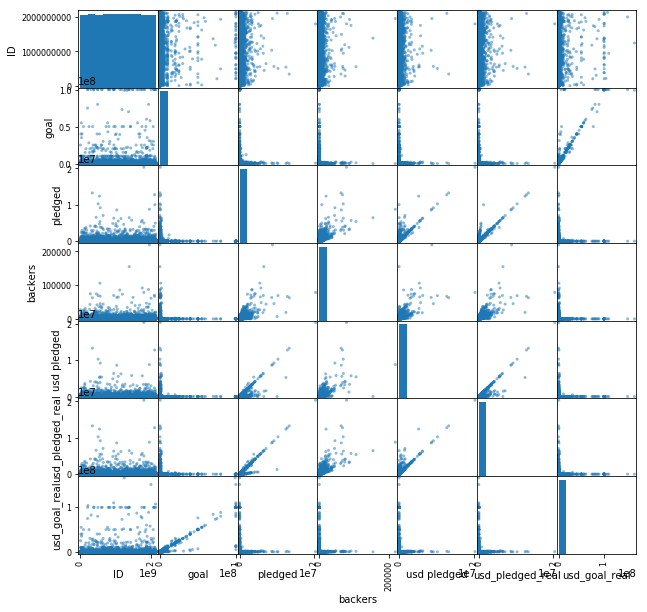

In [3]:
# 散布図行列を書いてみる
df_cloudfound_sct = pd.read_csv("../1_data/ks-projects-201801.csv")
pd.plotting.scatter_matrix(df_cloudfound_sct, figsize=(10,10))

In [4]:
plt.show()# 相関係数を確認
df_cloudfound.corr()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001686,0.000464,-0.001205,0.000657,-0.000635,-0.000028,0.001861
goal,0.001686,1.000000,0.007358,-0.024331,0.004012,0.005534,0.005104,0.942691
pledged,0.000464,0.007358,1.000000,0.111529,0.717050,0.857358,0.952839,0.005024
state,-0.001205,-0.024331,0.111529,1.000000,0.129102,0.097781,0.110695,-0.023050
backers,0.000657,0.004012,0.717050,0.129102,1.000000,0.697385,0.752512,0.004517
usd pledged,-0.000635,0.005534,0.857358,0.097781,0.697385,1.000000,0.907736,0.006172
usd_pledged_real,-0.000028,0.005104,0.952839,0.110695,0.752512,0.907736,1.000000,0.005596
usd_goal_real,0.001861,0.942691,0.005024,-0.023050,0.004517,0.006172,0.005596,1.000000


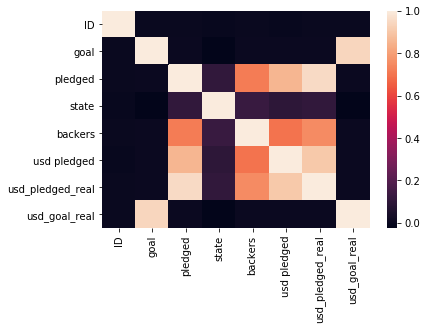

In [7]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_cloudfound.corr())
plt.show()

説明変数候補 
category or main_category
currency
goal　or usd_goal_real
deadline
launched
country

backers,pledged関連は事前の予測のため候補外

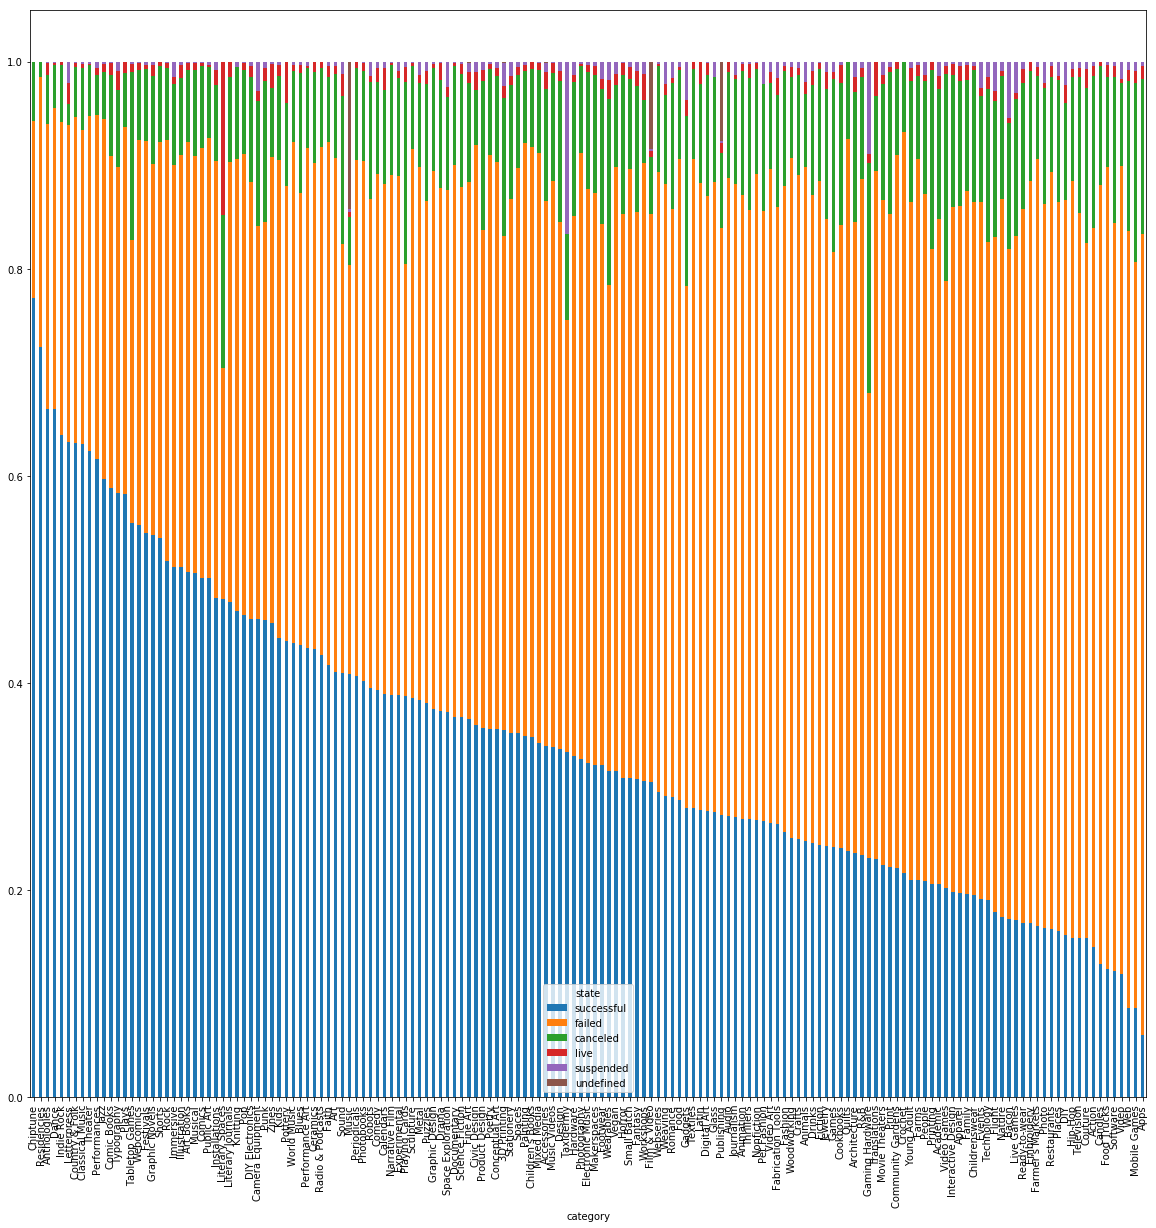

In [9]:
# categoryごとのstateの出現頻度を確認
# データ内のcategoryを抽出しcategoryに格納
category=df_cloudfound_sct.groupby('category')
# stateを相対的な頻度に変換
category=category['state'].value_counts(normalize=True).unstack() 
# successfulの降順ソート
category=category.sort_values(by=['successful'],ascending=False)
# 縦棒グラフ（積み上げ）でグラフ作成
category[['successful','failed','canceled','live','suspended','undefined']].plot(kind='bar',stacked=True,figsize=(20,20))

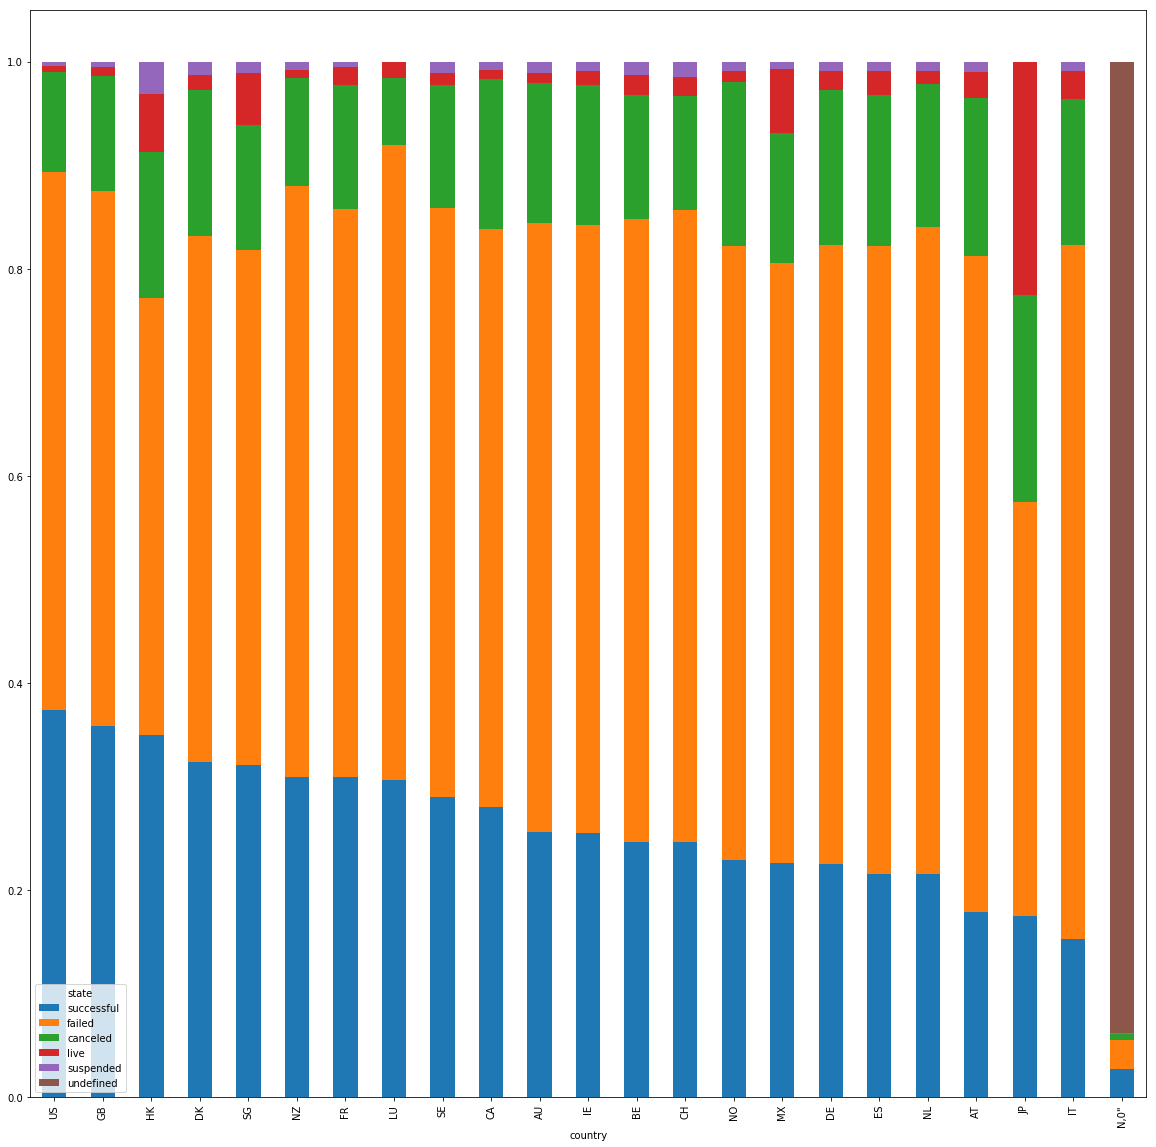

In [10]:
# countryごとのstateの出現頻度を確認
country=df_cloudfound_sct.groupby('country')
country=country['state'].value_counts(normalize=True).unstack()
country=country.sort_values(by=['successful'],ascending=False)
ax=country[['successful','failed','canceled','live','suspended','undefined']].plot(kind='bar',stacked=True,figsize=(20,20))

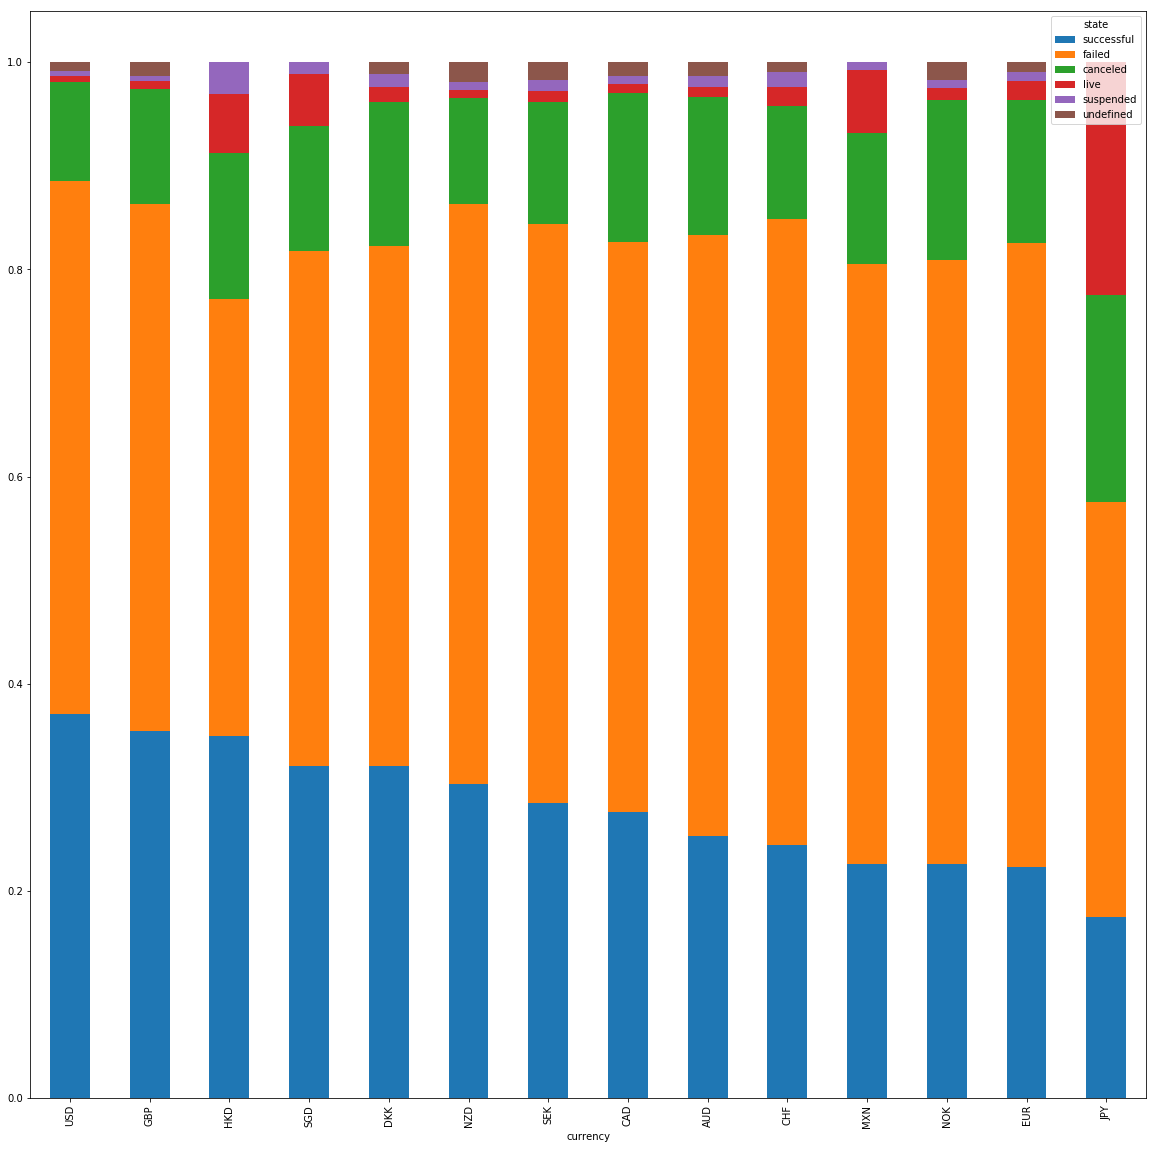

In [11]:
# currency毎のstateの出現頻度を確認
currency = df_cloudfound_sct.groupby('currency')
currency = currency['state'].value_counts(normalize=True).unstack()
currency = currency.sort_values(by=['successful'],ascending=False)
ax = currency[['successful','failed','canceled','live','suspended','undefined']].plot(kind='bar',stacked=True,figsize=(20,20))

説明変数候補 
category or main_category →　両者の相関性が強すぎるので１つでよさそう。とりあえず数が少ないmain_category
currency →　〇
goal　or usd_goal_real　→　両者の相関性が強すぎるので１つでよさそう。とりあえずgoal
deadline →　×:締日単独で結果が変わるなら、事前の予測では意味なし。
launched →　×:開始日単独で結果が変わるなら、事前の予測では意味なし。
country　→　〇


# Scikit-learnを用いたロジスティック回帰

In [13]:
df_cloudfound = pd.read_csv("../1_data/ks-projects-201801.csv")[['state', 'main_category', 'currency', 'country', 'goal']]
df_cloudfound['state'] = df_cloudfound['state'] == "successful"#bool型に変換
df_cloudfound['state'] = df_cloudfound['state'] * 1 #bool型を0,1に変換
#'goal'を0～1の範囲に正規化
df0 = df_cloudfound['goal']  
df_cloudfound['goal'] = (df0 - df0.min()) / (df0.max() - df0.min())
#'main_category'などラベルデータを0,1のダミー変数で置き換え&先頭行削除
df_cloudfound = pd.get_dummies(df_cloudfound, drop_first=True) 


# データ表示
display(df_cloudfound.head())

,state,goal,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,0.000010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000300,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.000450,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.000050,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.000195,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
y = df_cloudfound["state"].values
X = df_cloudfound.drop('state', axis=1).values


clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
# w0 = clf.intercept_[0]
# w1 = clf.coef_[0, 0]
# w2 = clf.coef_[0, 1]
# w3 = clf.coef_[0, 2]
# w4 = clf.coef_[0, 3]
# w5 = clf.coef_[0, 4]


# print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}'.format(w0, w1, w2, w3, w4, w5))
print('回帰係数')
print(clf.coef_)

回帰係数
[[-5.80083036  0.54405663 -0.8197425   0.87791279 -0.24638926 -0.75644556
  -0.17782187 -0.76874253 -0.23916112 -0.86803599  0.24294622 -0.46712107
  -0.39129909 -0.90900054  0.79210772 -0.07742356  0.02697239  0.49025751
  -0.47054747  0.22481947  0.2861033  -0.28057045 -0.14029773 -0.04410257
   0.08841681  0.01697069  0.21988166 -1.02728535  0.00942046  0.436166
   0.24243253  0.04744509  0.30751138 -0.11532528  0.28187383  0.80915149
   0.1360346   0.2861033   0.45589982 -0.14063504 -0.28057045  0.75000205
  -0.14029773 -2.26373937  0.30278253 -0.096552    0.18562804  0.11904968
   0.21988166  1.56083835]]


In [31]:
# ラベルを予測
y_pred = clf.predict(X)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 65.687%
適合率（Precision） = 66.194%
再現率（Recall） = 95.866%
F1値（F1-score） = 78.313%


In [32]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_pred), 
                        index=['正解 = Failed', '正解 = Successful'], 
                        columns=['予測 = Failed', '予測 = Successful'])
conf_mat

,予測 = Failed,予測 = Successful
正解 = Failed,234425,10108
正解 = Successful,119726,14124
